In [1]:
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt 
import seaborn as sn                   # For plotting graphs
import io
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [2]:
filepath2 = r"C:\Users\91623\OneDrive\Desktop\forage\coutomer.xlsx"
df1= pd.read_excel(filepath2)
print(df1)

       transaction_id  product_id  customer_id transaction_date  online_order  \
0                 140          11          462       2017-01-01           0.0   
1                 517          77          311       2017-01-01           1.0   
2                 561          65         2298       2017-01-01           0.0   
3                1293          67         1931       2017-01-01           1.0   
4                1403           0         2891       2017-01-01           1.0   
...               ...         ...          ...              ...           ...   
19957           17394          20          933       2017-12-30           0.0   
19958           18609          27         2372       2017-12-30           0.0   
19959           19346           4          543       2017-12-30           0.0   
19960           19907          41         1721       2017-12-30           0.0   
19961           19959           4         1787       2017-12-30           0.0   

      order_status         

In [3]:
df = df1

In [4]:
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,past_3_years_bike_related_purchases,age,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,state,MTW Status
0,140,11,462,2017-01-01,0.0,Approved,Giant Bicycles,Standard,high,medium,...,32,62.0,1960-01-01,NaN,Manufacturing,Affluent Customer,Yes,5.0,NSW,Matching
1,517,77,311,2017-01-01,1.0,Approved,WeareA2B,Standard,medium,medium,...,86,64.0,1957-08-16,Internal Auditor,Health,High Net Worth,No,12.0,NSW,Matching
2,561,65,2298,2017-01-01,0.0,Approved,WeareA2B,Standard,medium,medium,...,64,24.0,1997-10-28,Environmental Tech,Property,Mass Customer,Yes,5.0,VIC,Matching
3,1293,67,1931,2017-01-01,1.0,Approved,Norco Bicycles,Road,medium,medium,...,85,48.0,1973-11-06,Senior Developer,Health,Affluent Customer,No,6.0,QLD,Matching
4,1403,0,2891,2017-01-01,1.0,Approved,OHM Cycles,Standard,medium,medium,...,5,35.0,1987-02-22,Nuclear Power Engineer,Manufacturing,High Net Worth,Yes,12.0,NSW,Matching


In [5]:
df=df.drop('transaction_id',axis=1)

In [6]:
df=df.drop('product_id',axis=1)

In [7]:
df=df.drop('customer_id',axis=1)

In [8]:
df=df.drop('MTW Status',axis=1)

In [9]:
df.head()

,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,...,gender,past_3_years_bike_related_purchases,age,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,state
0,2017-01-01,0.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,42560.0,...,Female,32,62.0,1960-01-01,NaN,Manufacturing,Affluent Customer,Yes,5.0,NSW
1,2017-01-01,1.0,Approved,WeareA2B,Standard,medium,medium,1769.64,108.76,40672.0,...,Female,86,64.0,1957-08-16,Internal Auditor,Health,High Net Worth,No,12.0,NSW
2,2017-01-01,0.0,Approved,WeareA2B,Standard,medium,medium,1807.45,778.69,40410.0,...,Male,64,24.0,1997-10-28,Environmental Tech,Property,Mass Customer,Yes,5.0,VIC
3,2017-01-01,1.0,Approved,Norco Bicycles,Road,medium,medium,544.05,376.84,38647.0,...,Male,85,48.0,1973-11-06,Senior Developer,Health,Affluent Customer,No,6.0,QLD
4,2017-01-01,1.0,Approved,OHM Cycles,Standard,medium,medium,183.86,137.90,34170.0,...,Female,5,35.0,1987-02-22,Nuclear Power Engineer,Manufacturing,High Net Worth,Yes,12.0,NSW


In [10]:
df.shape

(19962, 23)

In [11]:
unique = [feature for feature in df.columns if len(df[feature].unique())>0 and len(df[feature].unique())<100]
for feature in unique:
    print("{} has {} unique values : {} {}".format(feature,len(df[feature].unique()),df[feature].unique(),"\n"))

online_order has 3 unique values : [ 0.  1. nan] 

order_status has 2 unique values : ['Approved' 'Cancelled'] 

brand has 7 unique values : ['Giant Bicycles' 'WeareA2B' 'Norco Bicycles' 'OHM Cycles' 'Solex'
 'Trek Bicycles' nan] 

product_line has 5 unique values : ['Standard' 'Road' 'Touring' 'Mountain' nan] 

product_class has 4 unique values : ['high' 'medium' 'low' nan] 

product_size has 4 unique values : ['medium' 'large' 'small' nan] 

gender has 6 unique values : ['Female' 'Male' 'U' 'F' 'M' 'Femal'] 

age has 55 unique values : [ 62.  64.  24.  48.  35.  66.  54.  52.  47.  41.  60.  37.  68.  42.
  55.  30.  49.  33.  67.  65.  26.  22.  25.  29.  59.  44.  28.  45.
  32.  50.  57.  46.  34.  36.  53. 122.  40.  27.  51.  23.  63.  56.
  43.  90.  20.  61.  21.  39.  38.  58.  31.  78.  86.  81.  nan] 

job_industry_category has 10 unique values : ['Manufacturing' 'Health' 'Property' 'IT' 'Financial Services' 'Retail'
 nan 'Entertainment' 'Telecommunications' 'Argiculture'] 

In [12]:
df.dropna()

,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,...,gender,past_3_years_bike_related_purchases,age,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,state
1,2017-01-01,1.0,Approved,WeareA2B,Standard,medium,medium,1769.64,108.76,40672.0,...,Female,86,64.0,1957-08-16,Internal Auditor,Health,High Net Worth,No,12.0,NSW
2,2017-01-01,0.0,Approved,WeareA2B,Standard,medium,medium,1807.45,778.69,40410.0,...,Male,64,24.0,1997-10-28,Environmental Tech,Property,Mass Customer,Yes,5.0,VIC
3,2017-01-01,1.0,Approved,Norco Bicycles,Road,medium,medium,544.05,376.84,38647.0,...,Male,85,48.0,1973-11-06,Senior Developer,Health,Affluent Customer,No,6.0,QLD
4,2017-01-01,1.0,Approved,OHM Cycles,Standard,medium,medium,183.86,137.90,34170.0,...,Female,5,35.0,1987-02-22,Nuclear Power Engineer,Manufacturing,High Net Worth,Yes,12.0,NSW
5,2017-01-01,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,37220.0,...,Male,69,66.0,1956-03-17,Marketing Manager,IT,Mass Customer,No,5.0,NSW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19957,2017-12-30,0.0,Approved,Trek Bicycles,Standard,medium,small,1775.81,1580.47,35160.0,...,Female,75,26.0,1996-05-19,Help Desk Operator,Retail,Mass Customer,Yes,5.0,NSW
19958,2017-12-30,0.0,Approved,Trek Bicycles,Standard,medium,medium,499.53,388.72,36334.0,...,Male,14,44.0,1977-09-10,Clinical Specialist,Health,Affluent Customer,No,10.0,VIC
19959,2017-12-30,0.0,Approved,Giant Bicycles,Standard,high,medium,1129.13,677.48,40649.0,...,Male,9,48.0,1973-08-03,Account Coordinator,Retail,Affluent Customer,Yes,17.0,NSW
19960,2017-12-30,0.0,Approved,Norco Bicycles,Standard,low,medium,958.74,748.90,38693.0,...,Female,82,41.0,1980-10-22,Senior Quality Engineer,Financial Services,High Net Worth,No,14.0,QLD


In [13]:
df.isnull().sum()

transaction_date                          0
online_order                            359
order_status                              0
brand                                   195
product_line                            195
product_class                           195
product_size                            195
list_price                                0
standard_cost                           195
product_first_sold_date                 195
product_first_sold_date.1               195
first_name                                0
last_name                               642
gender                                    0
past_3_years_bike_related_purchases       0
age                                       9
DOB                                     446
job_title                              2379
job_industry_category                  3222
wealth_segment                            0
owns_car                                  0
tenure                                  446
state                           

In [14]:
df=df.dropna()


In [15]:
df.isnull().sum()

transaction_date                       0
online_order                           0
order_status                           0
brand                                  0
product_line                           0
product_class                          0
product_size                           0
list_price                             0
standard_cost                          0
product_first_sold_date                0
product_first_sold_date.1              0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
age                                    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
owns_car                               0
tenure                                 0
state                                  0
dtype: int64

In [16]:
unique = [feature for feature in df.columns if len(df[feature].unique())>0 and len(df[feature].unique())<100]
for feature in unique:
    print("{} has {} unique values : {} {}".format(feature,len(df[feature].unique()),df[feature].unique(),"\n"))

online_order has 2 unique values : [1. 0.] 

order_status has 2 unique values : ['Approved' 'Cancelled'] 

brand has 6 unique values : ['WeareA2B' 'Norco Bicycles' 'OHM Cycles' 'Solex' 'Giant Bicycles'
 'Trek Bicycles'] 

product_line has 4 unique values : ['Standard' 'Road' 'Touring' 'Mountain'] 

product_class has 3 unique values : ['medium' 'high' 'low'] 

product_size has 3 unique values : ['medium' 'large' 'small'] 

gender has 4 unique values : ['Female' 'Male' 'F' 'Femal'] 

age has 52 unique values : [64. 24. 48. 35. 66. 54. 52. 47. 41. 62. 60. 37. 68. 55. 33. 67. 26. 22.
 25. 59. 44. 28. 45. 32. 50. 49. 46. 34. 53. 42. 40. 27. 36. 51. 23. 65.
 57. 43. 63. 90. 61. 29. 21. 39. 30. 56. 38. 58. 20. 31. 78. 86.] 

job_industry_category has 9 unique values : ['Health' 'Property' 'Manufacturing' 'IT' 'Financial Services' 'Retail'
 'Entertainment' 'Telecommunications' 'Argiculture'] 

wealth_segment has 3 unique values : ['High Net Worth' 'Mass Customer' 'Affluent Customer'] 

owns_ca

In [17]:
df['gender'].replace(to_replace=['F','Femal','U'] , value='Female', inplace=True)

In [18]:
df['gender'].replace(to_replace='M' , value='Male', inplace=True)

In [19]:
df['state'].replace(to_replace='New South Wales' , value='NSW', inplace=True)

In [20]:
df['state'].replace(to_replace='Victoria' , value='VIC', inplace=True)

In [21]:
df.columns = df.columns.str.lower()

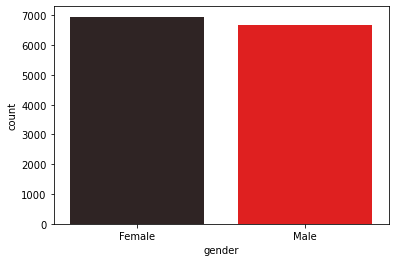

In [22]:
sns.countplot(df['gender'],palette='dark:r');


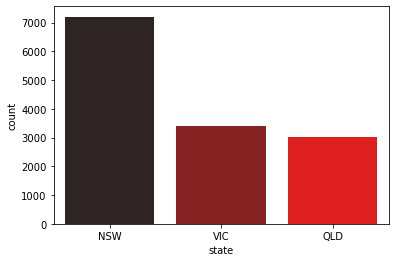

In [23]:
sns.countplot(df['state'],palette='dark:r');

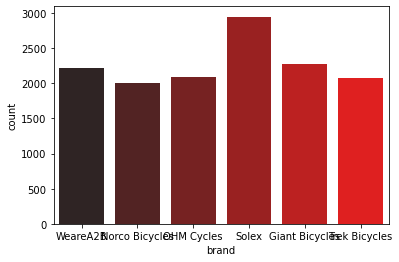

In [24]:
sns.countplot(df['brand'],palette='dark:r');

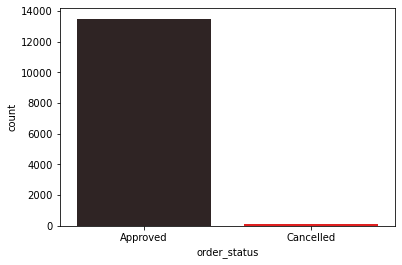

In [25]:
sns.countplot(df['order_status'],palette='dark:r');

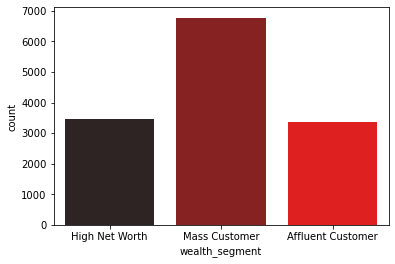

In [26]:
sns.countplot(df['wealth_segment'],palette='dark:r');

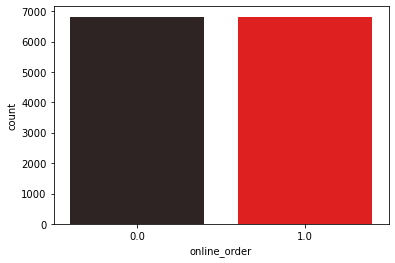

In [27]:
sns.countplot(df['online_order'],palette='dark:r');

In [28]:
from datetime import datetime
from datetime import date




In [29]:
df.head()

,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,...,gender,past_3_years_bike_related_purchases,age,dob,job_title,job_industry_category,wealth_segment,owns_car,tenure,state
1,2017-01-01,1.0,Approved,WeareA2B,Standard,medium,medium,1769.64,108.76,40672.0,...,Female,86,64.0,1957-08-16,Internal Auditor,Health,High Net Worth,No,12.0,NSW
2,2017-01-01,0.0,Approved,WeareA2B,Standard,medium,medium,1807.45,778.69,40410.0,...,Male,64,24.0,1997-10-28,Environmental Tech,Property,Mass Customer,Yes,5.0,VIC
3,2017-01-01,1.0,Approved,Norco Bicycles,Road,medium,medium,544.05,376.84,38647.0,...,Male,85,48.0,1973-11-06,Senior Developer,Health,Affluent Customer,No,6.0,QLD
4,2017-01-01,1.0,Approved,OHM Cycles,Standard,medium,medium,183.86,137.90,34170.0,...,Female,5,35.0,1987-02-22,Nuclear Power Engineer,Manufacturing,High Net Worth,Yes,12.0,NSW
5,2017-01-01,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,37220.0,...,Male,69,66.0,1956-03-17,Marketing Manager,IT,Mass Customer,No,5.0,NSW


In [30]:
df.columns

Index(['transaction_date', 'online_order', 'order_status', 'brand',
       'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date', 'product_first_sold_date.1',
       'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'age', 'dob', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure',
       'state'],
      dtype='object')

<AxesSubplot:xlabel='age', ylabel='Count'>

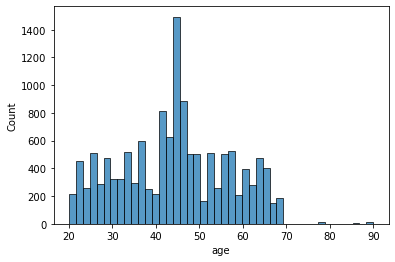

In [31]:
sns.histplot(data =df['age'])

In [32]:
df = df.drop(df[df['age']>70].index)

<AxesSubplot:xlabel='age', ylabel='Count'>

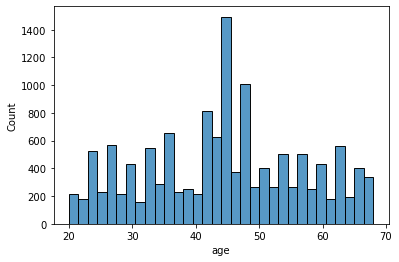

In [33]:
sns.histplot(data =df['age'])

In [34]:
 df.to_excel('clean_data_forger.xls', index=False)

In [35]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != "O"]
print("we have {} numerical features out of {}".format(len(numerical_features),len(df.columns)))

we have 9 numerical features out of 23


In [36]:
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<25]
print("we have {} discrete features out of {} total features".format(len(discrete_features),len(df.columns)))

we have 2 discrete features out of 23 total features


In [37]:
df[discrete_features].head()

,online_order,tenure
1,1.0,12.0
2,0.0,5.0
3,1.0,6.0
4,1.0,12.0
5,1.0,5.0


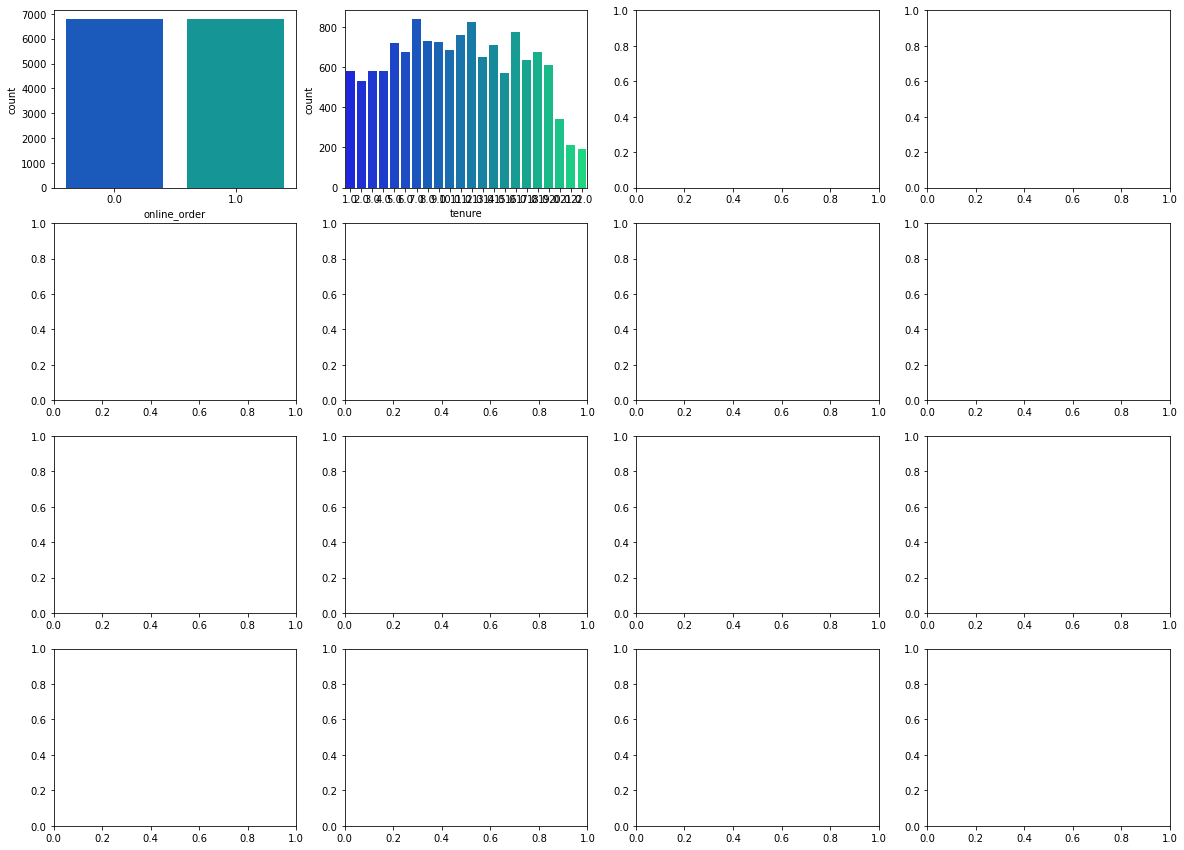

In [38]:
fig,ax = plt.subplots(4,4,figsize=(20,15))
for variable, subplot in zip(discrete_features,ax.flatten()):
    sns.countplot(df[variable],ax=subplot,palette="winter")

In [39]:
continuos_features = [feature for feature in numerical_features if feature not in discrete_features]
print("we have {} continuos features out of {} total features".format(len(continuos_features),len(df.columns)))

we have 7 continuos features out of 23 total features


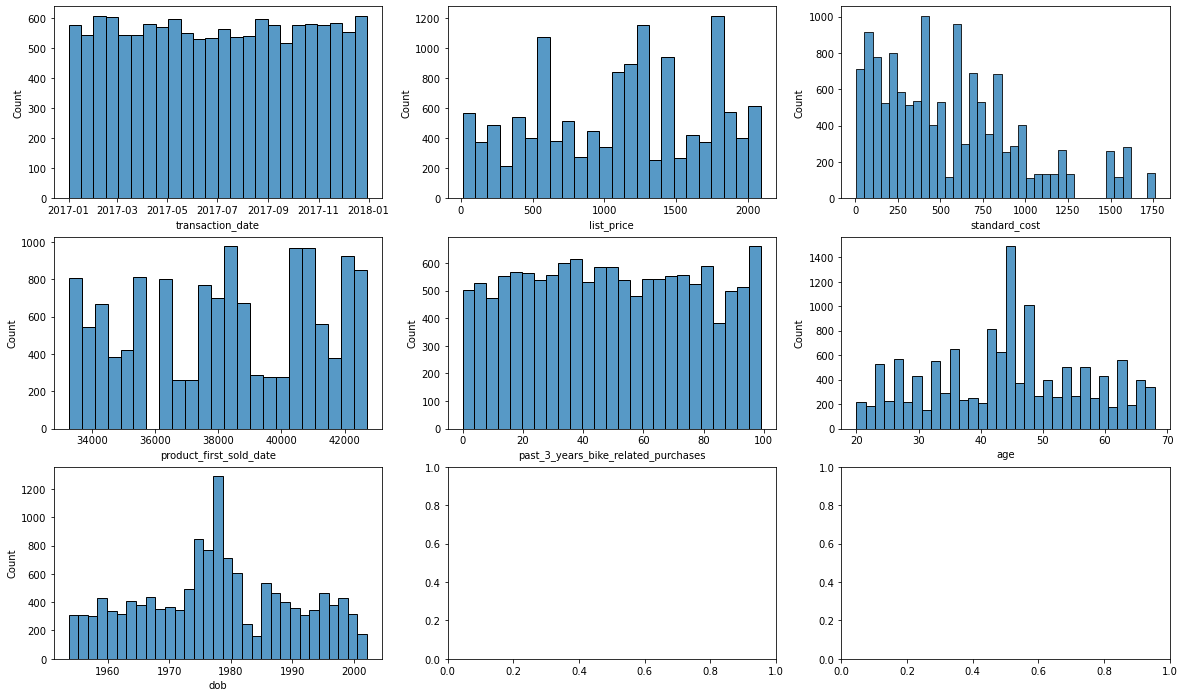

In [40]:
fig,ax = plt.subplots(3,3,figsize=(20,12))
for variable, subplot in zip(continuos_features,ax.flatten()):
    sns.histplot(df[variable],ax=subplot,palette="winter")

In [41]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]
print("we have {} continuos features out of {} features".format(len(categorical_features),len(df.columns)))

we have 14 continuos features out of 23 features


In [42]:
df[categorical_features].head()

,order_status,brand,product_line,product_class,product_size,product_first_sold_date.1,first_name,last_name,gender,job_title,job_industry_category,wealth_segment,owns_car,state
1,Approved,WeareA2B,Standard,medium,medium,2016-07-10 00:00:00,Jaimie,Halms,Female,Internal Auditor,Health,High Net Worth,No,NSW
2,Approved,WeareA2B,Standard,medium,medium,2016-07-11 00:00:00,Brigham,Vyse,Male,Environmental Tech,Property,Mass Customer,Yes,VIC
3,Approved,Norco Bicycles,Road,medium,medium,2016-07-12 00:00:00,Boris,Syres,Male,Senior Developer,Health,Affluent Customer,No,QLD
4,Approved,OHM Cycles,Standard,medium,medium,2016-07-13 00:00:00,Renae,Ughetti,Female,Nuclear Power Engineer,Manufacturing,High Net Worth,Yes,NSW
5,Approved,Solex,Standard,medium,medium,2016-07-14 00:00:00,Stewart,Brosoli,Male,Marketing Manager,IT,Mass Customer,No,NSW


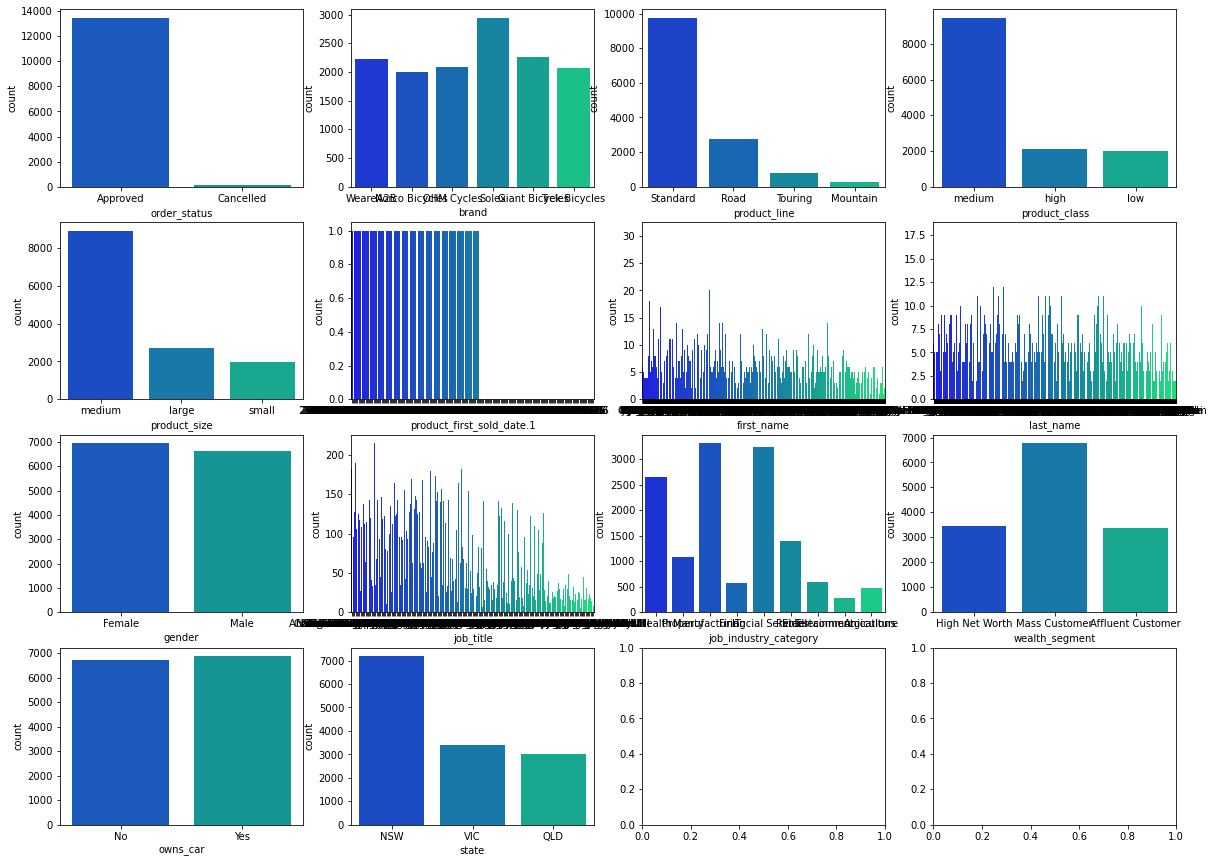

In [43]:
fig,ax = plt.subplots(4,4,figsize=(20,15))
for variable, subplot in zip(categorical_features,ax.flatten()):
    sns.countplot(df[variable],ax=subplot,palette="winter")

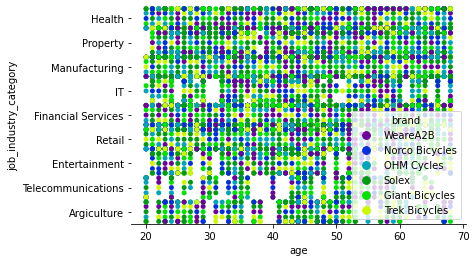

In [44]:
sns.set_palette(sns.color_palette("nipy_spectral", 8))

sns.swarmplot(y='job_industry_category',x='age',hue='brand',data=df)
sns.despine(top=True,right=True,left=True)


In [45]:
df=df.drop('job_title',axis=1)

In [46]:
df=df.drop('first_name',axis=1)

In [47]:
df=df.drop('last_name',axis=1)

In [48]:
df=df.drop('dob',axis=1)

In [49]:
df=df.drop('transaction_date',axis=1)

In [50]:
df=df.drop('product_first_sold_date.1', axis=1)

In [51]:
df.columns

Index(['online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'gender',
       'past_3_years_bike_related_purchases', 'age', 'job_industry_category',
       'wealth_segment', 'owns_car', 'tenure', 'state'],
      dtype='object')

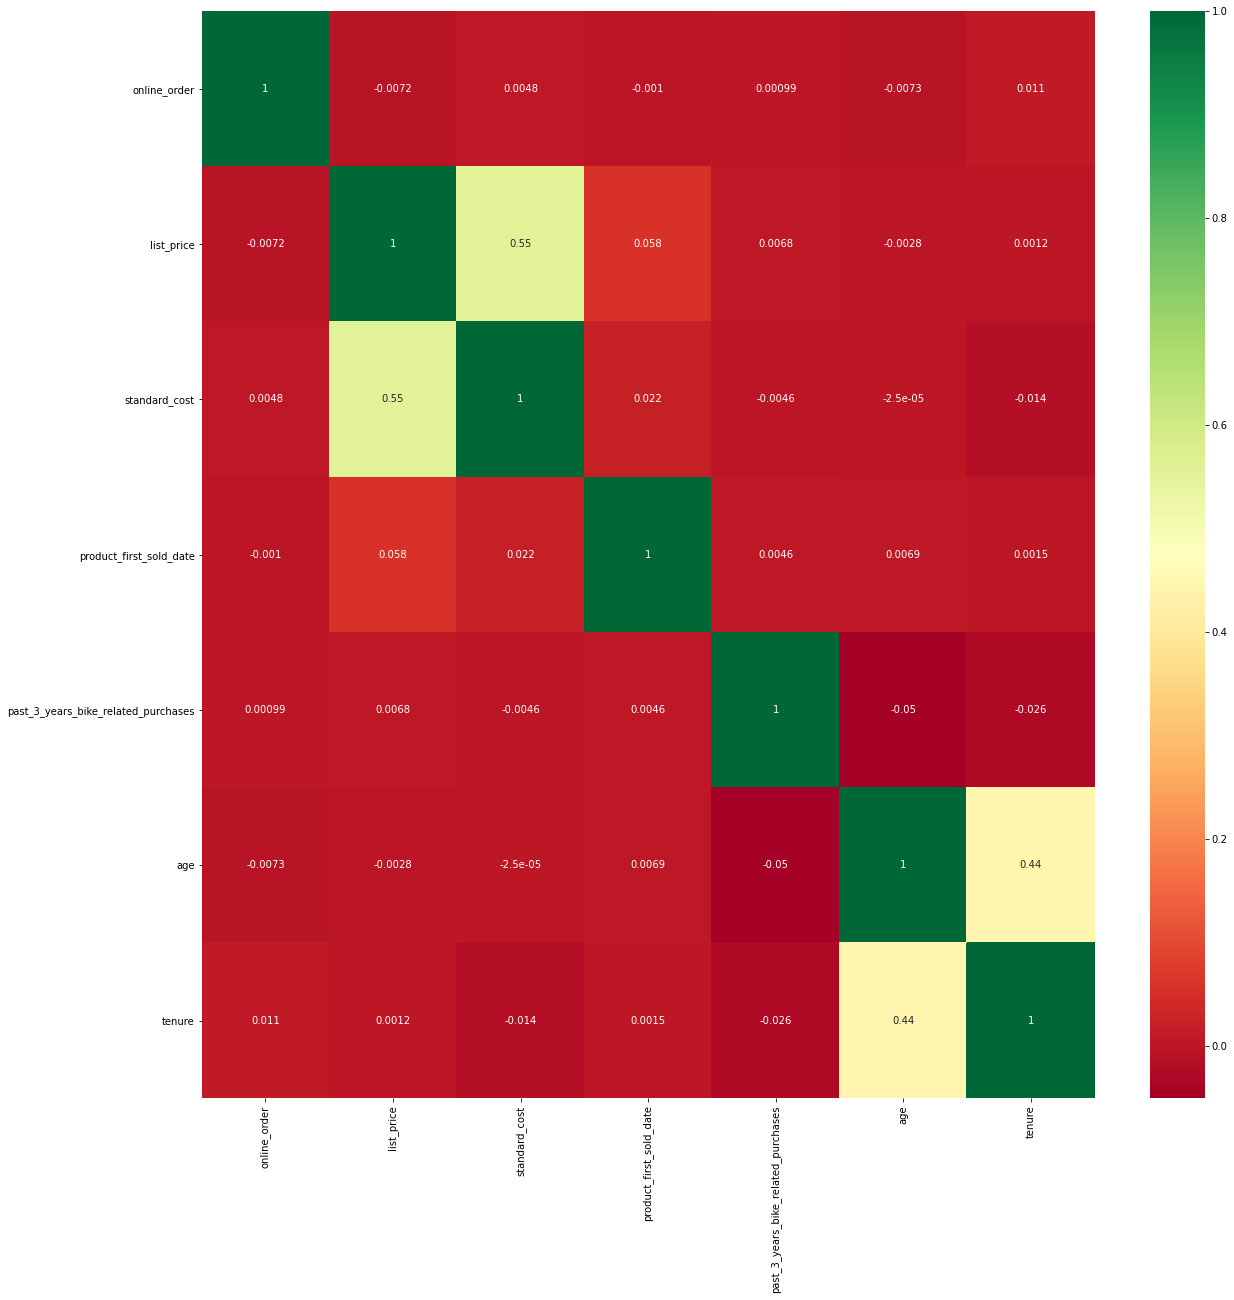

In [52]:
corrmat=df.corr()
top_corr=corrmat.index
plt.figure(figsize=(20,20))
g= sns.heatmap(df[top_corr].corr(),annot= True,cmap="RdYlGn")

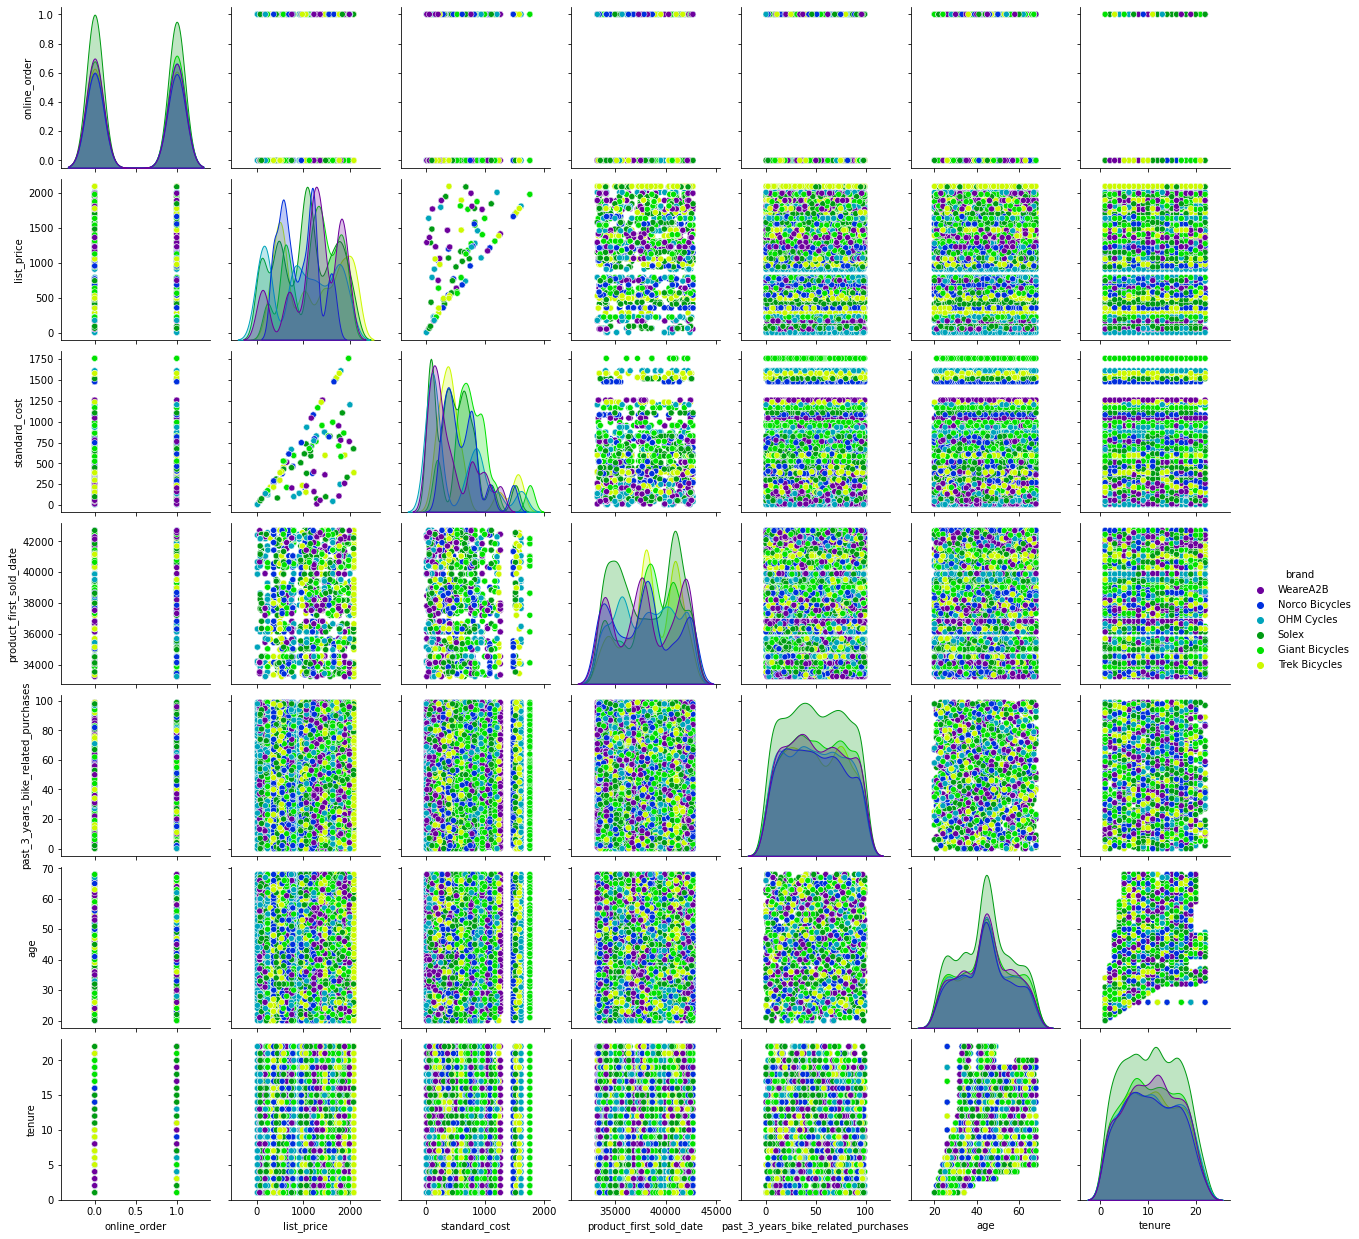

In [53]:
sns.pairplot(df,hue='brand')

In [54]:
df.head()

,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,gender,past_3_years_bike_related_purchases,age,job_industry_category,wealth_segment,owns_car,tenure,state
1,1.0,Approved,WeareA2B,Standard,medium,medium,1769.64,108.76,40672.0,Female,86,64.0,Health,High Net Worth,No,12.0,NSW
2,0.0,Approved,WeareA2B,Standard,medium,medium,1807.45,778.69,40410.0,Male,64,24.0,Property,Mass Customer,Yes,5.0,VIC
3,1.0,Approved,Norco Bicycles,Road,medium,medium,544.05,376.84,38647.0,Male,85,48.0,Health,Affluent Customer,No,6.0,QLD
4,1.0,Approved,OHM Cycles,Standard,medium,medium,183.86,137.90,34170.0,Female,5,35.0,Manufacturing,High Net Worth,Yes,12.0,NSW
5,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,37220.0,Male,69,66.0,IT,Mass Customer,No,5.0,NSW


In [55]:
df3=df.copy()

In [56]:
df.head()

,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,gender,past_3_years_bike_related_purchases,age,job_industry_category,wealth_segment,owns_car,tenure,state
1,1.0,Approved,WeareA2B,Standard,medium,medium,1769.64,108.76,40672.0,Female,86,64.0,Health,High Net Worth,No,12.0,NSW
2,0.0,Approved,WeareA2B,Standard,medium,medium,1807.45,778.69,40410.0,Male,64,24.0,Property,Mass Customer,Yes,5.0,VIC
3,1.0,Approved,Norco Bicycles,Road,medium,medium,544.05,376.84,38647.0,Male,85,48.0,Health,Affluent Customer,No,6.0,QLD
4,1.0,Approved,OHM Cycles,Standard,medium,medium,183.86,137.90,34170.0,Female,5,35.0,Manufacturing,High Net Worth,Yes,12.0,NSW
5,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,37220.0,Male,69,66.0,IT,Mass Customer,No,5.0,NSW


In [57]:
object_feat = [feature for feature in df3.columns if df3[feature].dtype == "O"]
df3[object_feat].head()

,order_status,brand,product_line,product_class,product_size,gender,job_industry_category,wealth_segment,owns_car,state
1,Approved,WeareA2B,Standard,medium,medium,Female,Health,High Net Worth,No,NSW
2,Approved,WeareA2B,Standard,medium,medium,Male,Property,Mass Customer,Yes,VIC
3,Approved,Norco Bicycles,Road,medium,medium,Male,Health,Affluent Customer,No,QLD
4,Approved,OHM Cycles,Standard,medium,medium,Female,Manufacturing,High Net Worth,Yes,NSW
5,Approved,Solex,Standard,medium,medium,Male,IT,Mass Customer,No,NSW


In [58]:

df.head()


,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,gender,past_3_years_bike_related_purchases,age,job_industry_category,wealth_segment,owns_car,tenure,state
1,1.0,Approved,WeareA2B,Standard,medium,medium,1769.64,108.76,40672.0,Female,86,64.0,Health,High Net Worth,No,12.0,NSW
2,0.0,Approved,WeareA2B,Standard,medium,medium,1807.45,778.69,40410.0,Male,64,24.0,Property,Mass Customer,Yes,5.0,VIC
3,1.0,Approved,Norco Bicycles,Road,medium,medium,544.05,376.84,38647.0,Male,85,48.0,Health,Affluent Customer,No,6.0,QLD
4,1.0,Approved,OHM Cycles,Standard,medium,medium,183.86,137.90,34170.0,Female,5,35.0,Manufacturing,High Net Worth,Yes,12.0,NSW
5,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,37220.0,Male,69,66.0,IT,Mass Customer,No,5.0,NSW


In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in object_feat:
    df3[i] = df3[[i]].apply(le.fit_transform)

In [60]:
df3.head()

,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,gender,past_3_years_bike_related_purchases,age,job_industry_category,wealth_segment,owns_car,tenure,state
1,1.0,0,5,2,2,1,1769.64,108.76,40672.0,0,86,64.0,3,1,0,12.0,0
2,0.0,0,5,2,2,1,1807.45,778.69,40410.0,1,64,24.0,6,2,1,5.0,2
3,1.0,0,1,1,2,1,544.05,376.84,38647.0,1,85,48.0,3,0,0,6.0,1
4,1.0,0,2,2,2,1,183.86,137.90,34170.0,0,5,35.0,5,1,1,12.0,0
5,1.0,0,3,2,2,1,1577.53,826.51,37220.0,1,69,66.0,4,2,0,5.0,0


In [61]:
df.head()

,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,gender,past_3_years_bike_related_purchases,age,job_industry_category,wealth_segment,owns_car,tenure,state
1,1.0,Approved,WeareA2B,Standard,medium,medium,1769.64,108.76,40672.0,Female,86,64.0,Health,High Net Worth,No,12.0,NSW
2,0.0,Approved,WeareA2B,Standard,medium,medium,1807.45,778.69,40410.0,Male,64,24.0,Property,Mass Customer,Yes,5.0,VIC
3,1.0,Approved,Norco Bicycles,Road,medium,medium,544.05,376.84,38647.0,Male,85,48.0,Health,Affluent Customer,No,6.0,QLD
4,1.0,Approved,OHM Cycles,Standard,medium,medium,183.86,137.90,34170.0,Female,5,35.0,Manufacturing,High Net Worth,Yes,12.0,NSW
5,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,37220.0,Male,69,66.0,IT,Mass Customer,No,5.0,NSW


In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
df2 = scaler.fit_transform(df3)

In [63]:
df2 = pd.DataFrame(df2,columns = df3.columns)

In [64]:
df2

,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,gender,past_3_years_bike_related_purchases,age,job_industry_category,wealth_segment,owns_car,tenure,state
0,1.000221,-0.099018,1.468835,0.329845,0.614039,0.095633,1.128566,-1.099350,0.849928,-0.977667,1.276818,1.599646,-0.433672,-0.303225,-1.012658,0.221493,-0.860632
1,-0.999779,-0.099018,1.468835,0.329845,0.614039,0.095633,1.193264,0.540603,0.758976,1.022843,0.507755,-1.620836,1.086380,0.907093,0.987500,-1.012823,1.528402
2,1.000221,-0.099018,-0.909254,-1.463136,0.614039,0.095633,-0.968569,-0.443104,0.146956,1.022843,1.241860,0.311453,-0.433672,-1.513543,-1.012658,-0.836492,0.333885
3,1.000221,-0.099018,-0.314732,0.329845,0.614039,0.095633,-1.584898,-1.028017,-1.407220,-0.977667,-1.554731,-0.735203,0.579696,-0.303225,0.987500,0.221493,-0.860632
4,1.000221,-0.099018,0.279791,0.329845,0.614039,0.095633,0.799842,0.657663,-0.348422,1.022843,0.682542,1.760670,0.073012,0.907093,-1.012658,-1.012823,-0.860632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13590,-0.999779,-0.099018,0.874313,0.329845,0.614039,1.806328,1.139124,2.503317,-1.063545,-0.977667,0.892286,-1.459811,1.593064,0.907093,0.987500,-1.012823,-0.860632
13591,-0.999779,-0.099018,0.874313,0.329845,0.614039,0.095633,-1.044748,-0.414023,-0.655994,1.022843,-1.240114,-0.010595,-0.433672,-1.513543,-1.012658,-0.131168,1.528402
13592,-0.999779,-0.099018,-1.503776,0.329845,-2.061985,0.095633,0.032575,0.292846,0.841944,1.022843,-1.414901,0.311453,1.593064,-1.513543,0.987500,1.103148,-0.860632
13593,-0.999779,-0.099018,-0.909254,0.329845,-0.723973,0.095633,-0.258983,0.467678,0.162925,-0.977667,1.136988,-0.252131,-0.940357,-0.303225,-1.012658,0.574155,0.333885


In [65]:
df.head()

,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,gender,past_3_years_bike_related_purchases,age,job_industry_category,wealth_segment,owns_car,tenure,state
1,1.0,Approved,WeareA2B,Standard,medium,medium,1769.64,108.76,40672.0,Female,86,64.0,Health,High Net Worth,No,12.0,NSW
2,0.0,Approved,WeareA2B,Standard,medium,medium,1807.45,778.69,40410.0,Male,64,24.0,Property,Mass Customer,Yes,5.0,VIC
3,1.0,Approved,Norco Bicycles,Road,medium,medium,544.05,376.84,38647.0,Male,85,48.0,Health,Affluent Customer,No,6.0,QLD
4,1.0,Approved,OHM Cycles,Standard,medium,medium,183.86,137.90,34170.0,Female,5,35.0,Manufacturing,High Net Worth,Yes,12.0,NSW
5,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,37220.0,Male,69,66.0,IT,Mass Customer,No,5.0,NSW


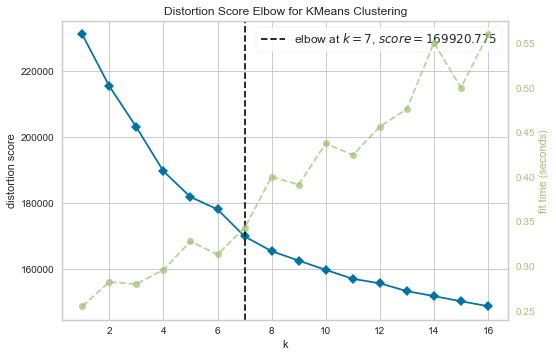

In [66]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,17))
visualizer.fit(df2)
visualizer.show();

In [67]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=0)
pred_kmeans = kmeans.fit_predict(df2)

In [68]:
df.head()

,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,gender,past_3_years_bike_related_purchases,age,job_industry_category,wealth_segment,owns_car,tenure,state
1,1.0,Approved,WeareA2B,Standard,medium,medium,1769.64,108.76,40672.0,Female,86,64.0,Health,High Net Worth,No,12.0,NSW
2,0.0,Approved,WeareA2B,Standard,medium,medium,1807.45,778.69,40410.0,Male,64,24.0,Property,Mass Customer,Yes,5.0,VIC
3,1.0,Approved,Norco Bicycles,Road,medium,medium,544.05,376.84,38647.0,Male,85,48.0,Health,Affluent Customer,No,6.0,QLD
4,1.0,Approved,OHM Cycles,Standard,medium,medium,183.86,137.90,34170.0,Female,5,35.0,Manufacturing,High Net Worth,Yes,12.0,NSW
5,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,37220.0,Male,69,66.0,IT,Mass Customer,No,5.0,NSW


In [69]:
df['pred_kmeans'] = pred_kmeans+1
df.head()

,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,gender,past_3_years_bike_related_purchases,age,job_industry_category,wealth_segment,owns_car,tenure,state,pred_kmeans
1,1.0,Approved,WeareA2B,Standard,medium,medium,1769.64,108.76,40672.0,Female,86,64.0,Health,High Net Worth,No,12.0,NSW,1
2,0.0,Approved,WeareA2B,Standard,medium,medium,1807.45,778.69,40410.0,Male,64,24.0,Property,Mass Customer,Yes,5.0,VIC,2
3,1.0,Approved,Norco Bicycles,Road,medium,medium,544.05,376.84,38647.0,Male,85,48.0,Health,Affluent Customer,No,6.0,QLD,3
4,1.0,Approved,OHM Cycles,Standard,medium,medium,183.86,137.90,34170.0,Female,5,35.0,Manufacturing,High Net Worth,Yes,12.0,NSW,3
5,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,37220.0,Male,69,66.0,IT,Mass Customer,No,5.0,NSW,1


In [70]:
df.isnull().sum()

online_order                           0
order_status                           0
brand                                  0
product_line                           0
product_class                          0
product_size                           0
list_price                             0
standard_cost                          0
product_first_sold_date                0
gender                                 0
past_3_years_bike_related_purchases    0
age                                    0
job_industry_category                  0
wealth_segment                         0
owns_car                               0
tenure                                 0
state                                  0
pred_kmeans                            0
dtype: int64

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13595 entries, 1 to 19961
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   online_order                         13595 non-null  float64
 1   order_status                         13595 non-null  object 
 2   brand                                13595 non-null  object 
 3   product_line                         13595 non-null  object 
 4   product_class                        13595 non-null  object 
 5   product_size                         13595 non-null  object 
 6   list_price                           13595 non-null  float64
 7   standard_cost                        13595 non-null  float64
 8   product_first_sold_date              13595 non-null  float64
 9   gender                               13595 non-null  object 
 10  past_3_years_bike_related_purchases  13595 non-null  int64  
 11  age                         

In [72]:
personal = df[['gender','owns_car','state','wealth_segment','job_industry_category','brand','product_class','product_size','product_line','order_status']]

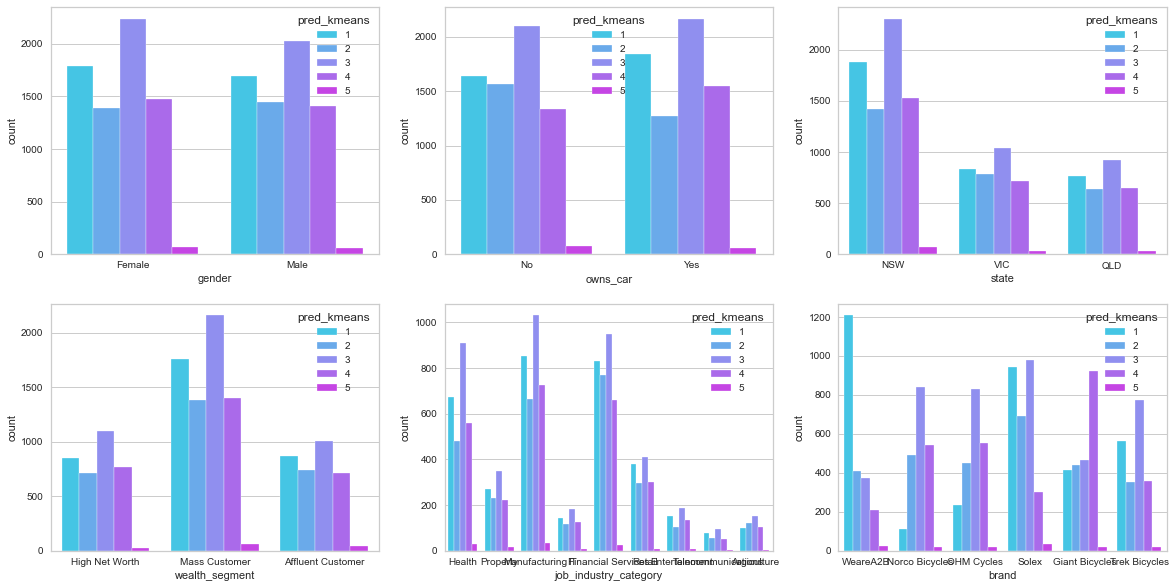

In [73]:
fig,ax = plt.subplots(2,3,figsize=(20,10))
sns.set_style('darkgrid')
for variable, subplot in zip(personal,ax.flatten()):
    sns.countplot(df[variable],hue=df['pred_kmeans'],ax=subplot,palette='cool')

In [74]:
other = df[['list_price','standard_cost','product_first_sold_date']]

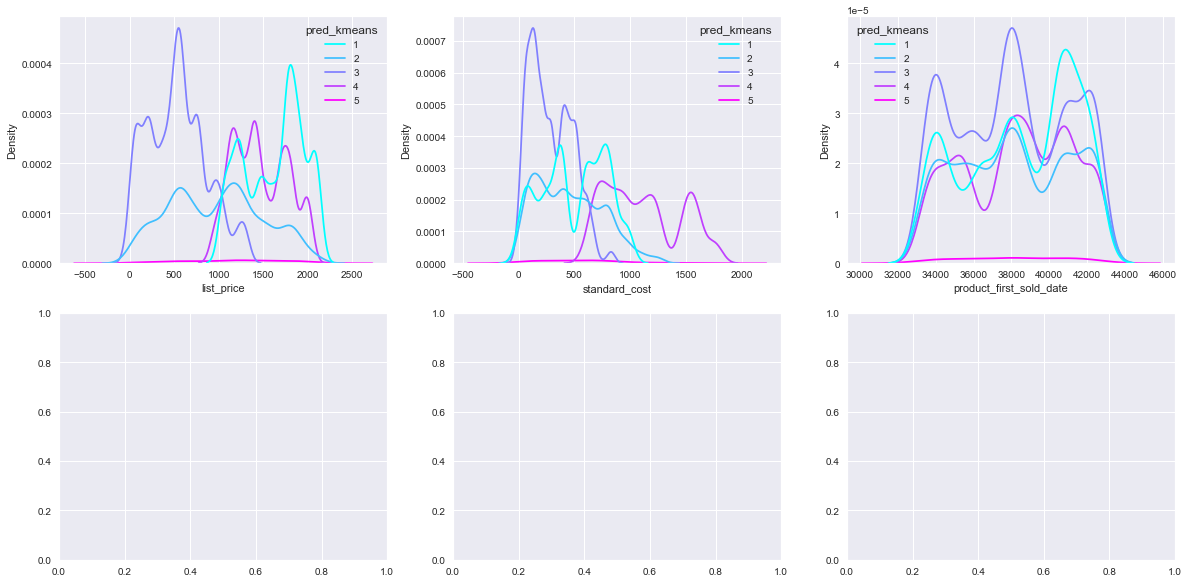

In [75]:
fig,ax = plt.subplots(2,3,figsize=(20,10))
sns.set_style('darkgrid')
for variable, subplot in zip(other,ax.flatten()):
    sns.kdeplot(data= df,x=variable,hue='pred_kmeans',ax=subplot,palette='cool')

In [76]:
personalnum = df[['age','tenure']]

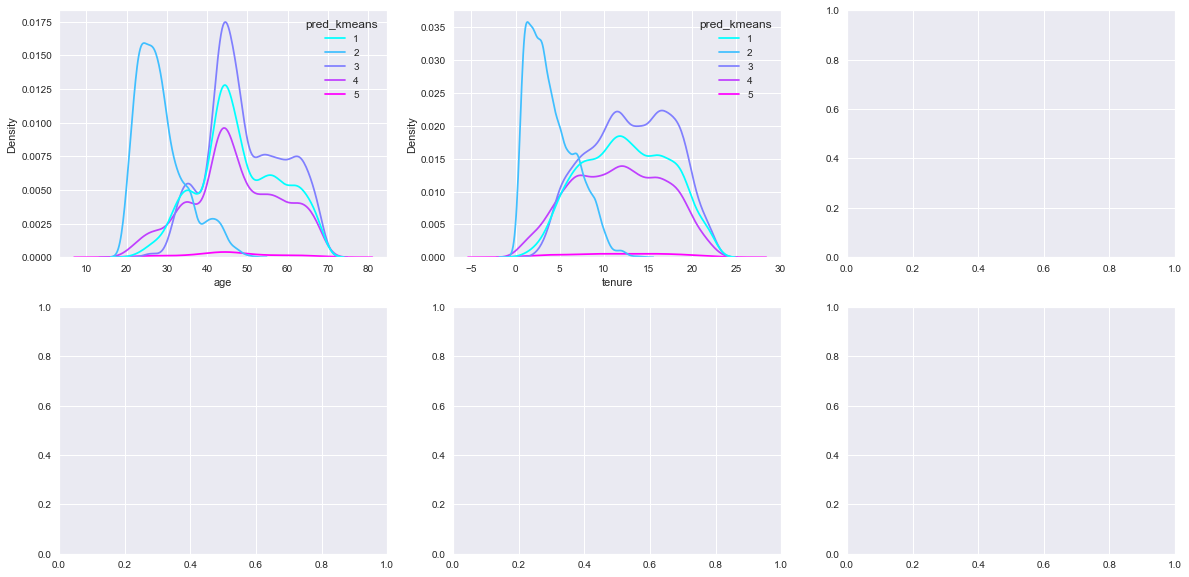

In [77]:
fig,ax = plt.subplots(2,3,figsize=(20,10))
sns.set_style('darkgrid')
for variable, subplot in zip(personalnum,ax.flatten()):
    sns.kdeplot(data= df,x=variable,hue='pred_kmeans',ax=subplot,palette='cool')

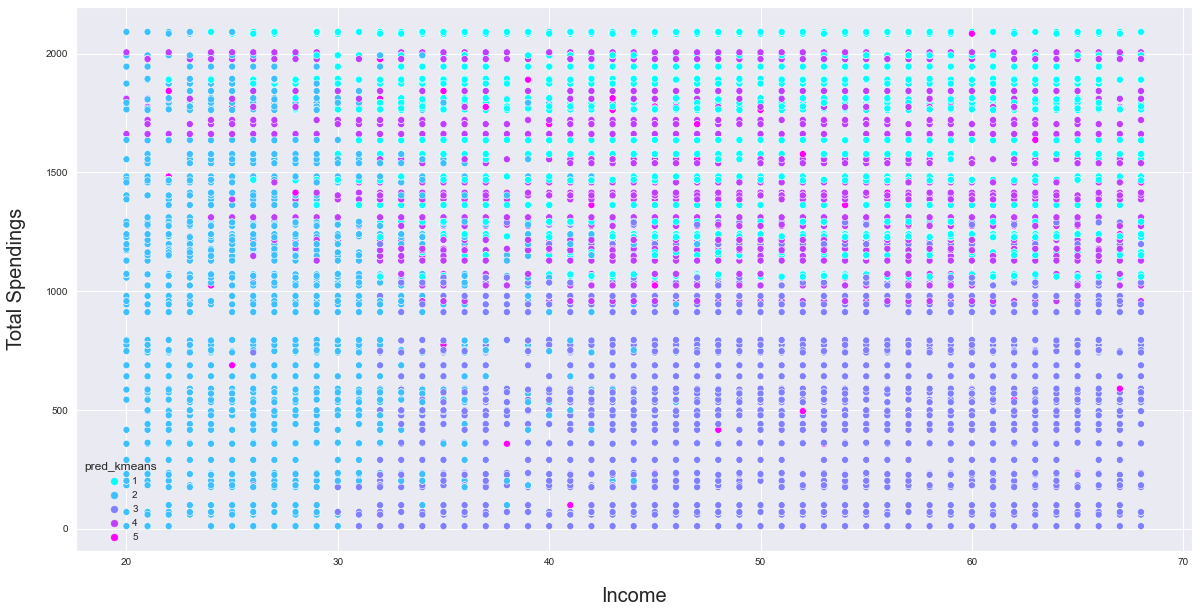

In [78]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df, x='age', y='list_price', hue='pred_kmeans' ,palette='cool');
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Total Spendings', fontsize=20, labelpad=20);

In [79]:
 df.to_excel('OLD_data_forger.xls', index=False)

In [80]:
filepath2 = r"C:\Users\91623\OneDrive\Desktop\forage\newcous.xlsx"
fg= pd.read_excel(filepath2)
print(df)

       online_order order_status           brand product_line product_class  \
1               1.0     Approved        WeareA2B     Standard        medium   
2               0.0     Approved        WeareA2B     Standard        medium   
3               1.0     Approved  Norco Bicycles         Road        medium   
4               1.0     Approved      OHM Cycles     Standard        medium   
5               1.0     Approved           Solex     Standard        medium   
...             ...          ...             ...          ...           ...   
19957           0.0     Approved   Trek Bicycles     Standard        medium   
19958           0.0     Approved   Trek Bicycles     Standard        medium   
19959           0.0     Approved  Giant Bicycles     Standard          high   
19960           0.0     Approved  Norco Bicycles     Standard           low   
19961           0.0     Approved           Solex     Standard        medium   

      product_size  list_price  standard_cost  prod

In [81]:
fg.head()

,first_name,last_name,gender,past_3_years,AGE,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,postcode,state,country,Rank
0,Chickie,Brister,Male,86,64,1957-07-12,General Manager,Manufacturing,Mass Customer,Yes,14,4500,QLD,Australia,1
1,Morly,Genery,Male,69,52,1970-03-22,Structural Engineer,Property,Mass Customer,No,16,2113,NSW,Australia,1
2,Ardelis,Forrester,Female,10,47,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,No,10,3505,VIC,Australia,1
3,Lucine,Stutt,Female,64,43,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,Yes,5,4814,QLD,Australia,4
4,Melinda,Hadlee,Female,34,56,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,No,19,2093,NSW,Australia,4


In [82]:
fg=fg.drop('first_name',axis=1)

In [83]:
fg=fg.drop('last_name',axis=1)

In [84]:
fg=fg.drop('job_title',axis=1)

In [85]:
fg=fg.drop('Rank',axis=1)

In [86]:
unique = [feature for feature in fg.columns if len(fg[feature].unique())>0 and len(fg[feature].unique())<100]
for feature in unique:
    print("{} has {} unique values : {} {}".format(feature,len(fg[feature].unique()),fg[feature].unique(),"\n"))

gender has 3 unique values : ['Male' 'Female' 'U'] 

AGE has 65 unique values : [ 64  52  47  43  56  71  45  49  50  36  27  22  32  58  68  28  83  67
  53  39  76  69  55  61  42  70  35  66  37  75  65  72  44  23  40  41
 122  80  25  48  46  79  31  82  60  26  24  34  59  54  21  73  51  33
  29  57  30  78  63  77  38  81  74  62  20] 

job_industry_category has 9 unique values : ['Manufacturing' 'Property' 'Financial Services' 'Entertainment' 'Retail'
 'IT' 'Telecommunications' 'Health' 'Argiculture'] 

wealth_segment has 3 unique values : ['Mass Customer' 'Affluent Customer' 'High Net Worth'] 

owns_car has 2 unique values : ['Yes' 'No'] 

tenure has 23 unique values : [14 16 10  5 19 22  8 17  3  9  4 11 12 13  7 20 15  6 18 21  2  1  0] 

state has 3 unique values : ['QLD' 'NSW' 'VIC'] 

country has 1 unique values : ['Australia'] 



In [87]:
fg.head()

,gender,past_3_years,AGE,DOB,job_industry_category,wealth_segment,owns_car,tenure,postcode,state,country
0,Male,86,64,1957-07-12,Manufacturing,Mass Customer,Yes,14,4500,QLD,Australia
1,Male,69,52,1970-03-22,Property,Mass Customer,No,16,2113,NSW,Australia
2,Female,10,47,1974-08-28,Financial Services,Affluent Customer,No,10,3505,VIC,Australia
3,Female,64,43,1979-01-28,Manufacturing,Affluent Customer,Yes,5,4814,QLD,Australia
4,Female,34,56,1965-09-21,Financial Services,Affluent Customer,No,19,2093,NSW,Australia


In [88]:
fg=fg.drop('country',axis=1)

In [89]:
fg.dropna()

,gender,past_3_years,AGE,DOB,job_industry_category,wealth_segment,owns_car,tenure,postcode,state
0,Male,86,64,1957-07-12,Manufacturing,Mass Customer,Yes,14,4500,QLD
1,Male,69,52,1970-03-22,Property,Mass Customer,No,16,2113,NSW
2,Female,10,47,1974-08-28,Financial Services,Affluent Customer,No,10,3505,VIC
3,Female,64,43,1979-01-28,Manufacturing,Affluent Customer,Yes,5,4814,QLD
4,Female,34,56,1965-09-21,Financial Services,Affluent Customer,No,19,2093,NSW
...,...,...,...,...,...,...,...,...,...,...
830,Male,60,62,1959-10-07,Financial Services,Affluent Customer,No,9,2200,NSW
831,Male,22,20,2001-10-17,Health,Mass Customer,No,6,2196,NSW
832,Female,17,67,1954-10-05,Financial Services,Affluent Customer,Yes,15,4702,QLD
833,Male,30,69,1952-12-17,Financial Services,Mass Customer,Yes,19,4215,QLD


In [90]:
fg.describe()

,past_3_years,AGE,tenure,postcode
count,835.000000,835.000000,835.000000,835.000000
mean,50.322156,51.758084,11.354491,3018.805988
std,27.560405,19.544855,4.996770,849.086917
min,0.000000,20.000000,0.000000,2000.000000
25%,28.000000,39.000000,7.000000,2210.500000
50%,51.000000,50.000000,11.000000,2871.000000
75%,72.000000,65.000000,15.000000,3818.000000
max,99.000000,122.000000,22.000000,4879.000000


In [91]:
fg.corr()

,past_3_years,AGE,tenure,postcode
past_3_years,1.000000,-0.028114,-0.058121,0.014810
AGE,-0.028114,1.000000,0.206565,0.012354
tenure,-0.058121,0.206565,1.000000,0.036482
postcode,0.014810,0.012354,0.036482,1.000000


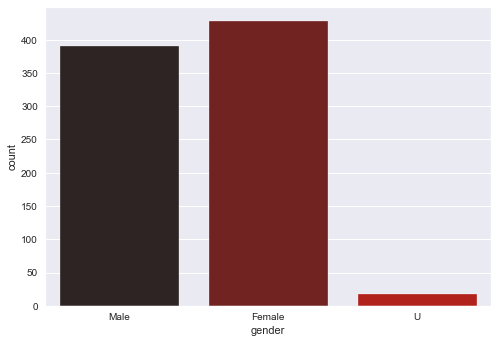

In [92]:
sns.countplot(fg['gender'],palette='dark:r');


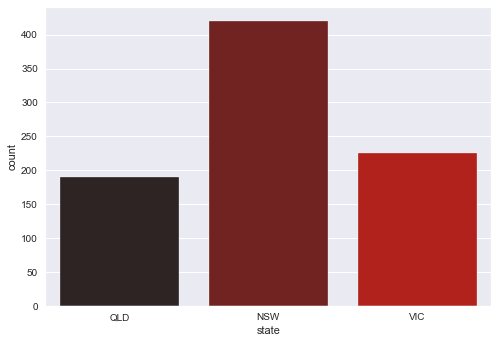

In [93]:
sns.countplot(fg['state'],palette='dark:r');

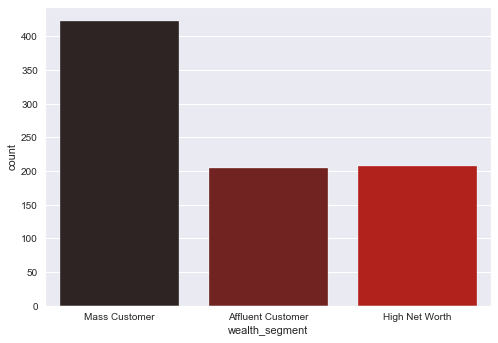

In [94]:
sns.countplot(fg['wealth_segment'],palette='dark:r');

In [95]:
fg=fg.drop('postcode',axis=1)

In [96]:
fg=fg.drop('DOB',axis=1)

In [97]:
continuos_features = [feature for feature in numerical_features if feature not in discrete_features]
print("we have {} continuos features out of {} total features".format(len(continuos_features),len(fg.columns)))

we have 7 continuos features out of 8 total features


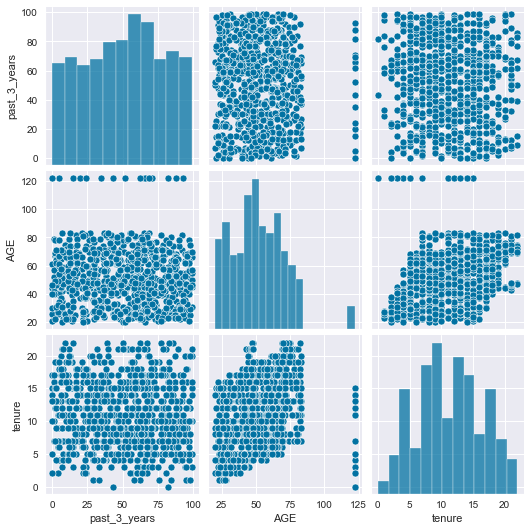

In [98]:
sns.pairplot(fg)

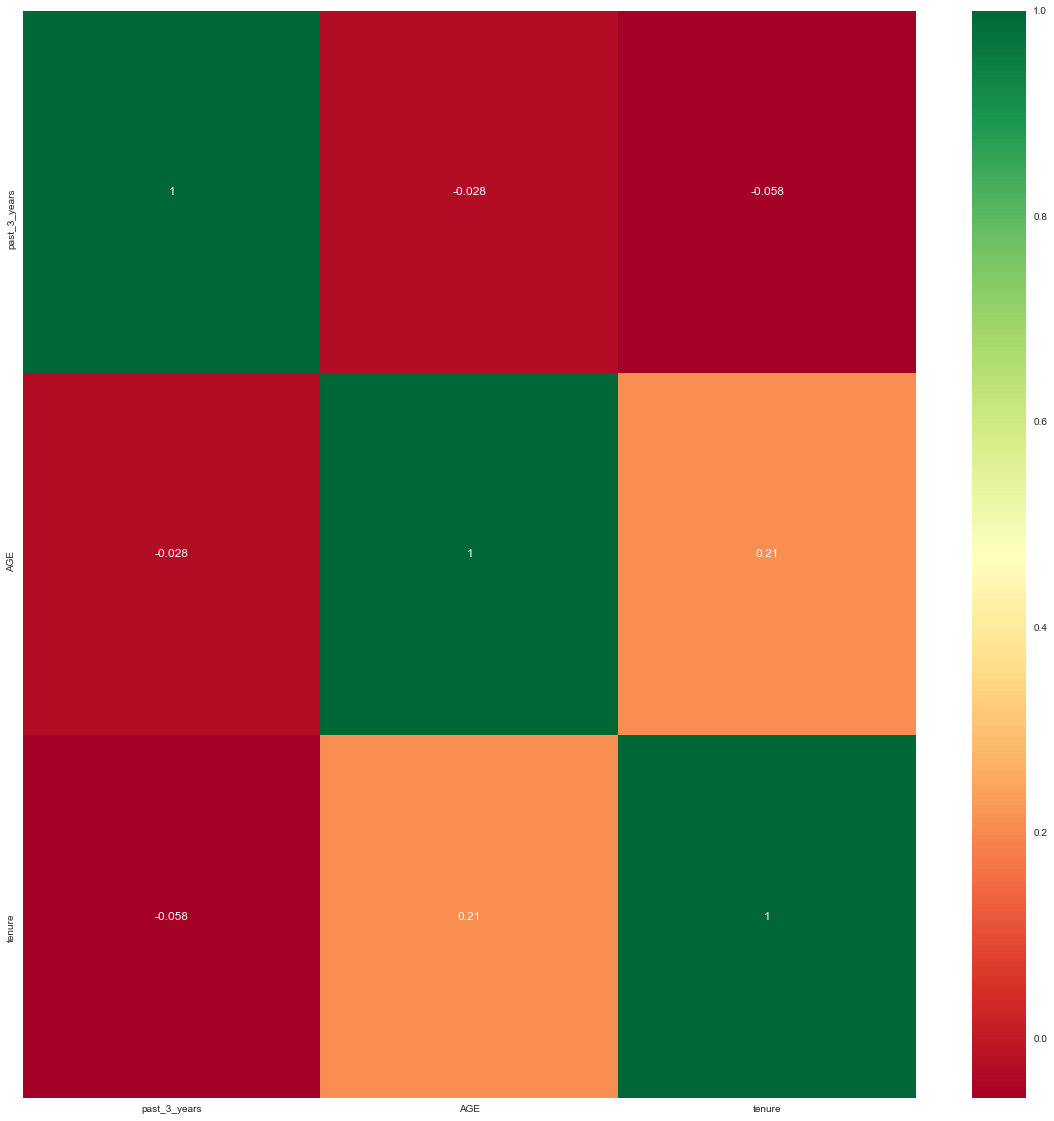

In [99]:
corrmat=fg.corr()
top_corr=corrmat.index
plt.figure(figsize=(20,20))
f= sns.heatmap(fg[top_corr].corr(),annot= True,cmap="RdYlGn")

In [100]:
fg1=fg.copy()

In [101]:
fg.head()

,gender,past_3_years,AGE,job_industry_category,wealth_segment,owns_car,tenure,state
0,Male,86,64,Manufacturing,Mass Customer,Yes,14,QLD
1,Male,69,52,Property,Mass Customer,No,16,NSW
2,Female,10,47,Financial Services,Affluent Customer,No,10,VIC
3,Female,64,43,Manufacturing,Affluent Customer,Yes,5,QLD
4,Female,34,56,Financial Services,Affluent Customer,No,19,NSW


In [102]:
fg1.head()

,gender,past_3_years,AGE,job_industry_category,wealth_segment,owns_car,tenure,state
0,Male,86,64,Manufacturing,Mass Customer,Yes,14,QLD
1,Male,69,52,Property,Mass Customer,No,16,NSW
2,Female,10,47,Financial Services,Affluent Customer,No,10,VIC
3,Female,64,43,Manufacturing,Affluent Customer,Yes,5,QLD
4,Female,34,56,Financial Services,Affluent Customer,No,19,NSW


In [103]:
object_feat1 = [feature for feature in fg1.columns if fg1[feature].dtype == "O"]
fg1[object_feat1].head()

,gender,job_industry_category,wealth_segment,owns_car,state
0,Male,Manufacturing,Mass Customer,Yes,QLD
1,Male,Property,Mass Customer,No,NSW
2,Female,Financial Services,Affluent Customer,No,VIC
3,Female,Manufacturing,Affluent Customer,Yes,QLD
4,Female,Financial Services,Affluent Customer,No,NSW


In [104]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in object_feat1:
    fg1[i] = fg1[[i]].apply(le.fit_transform)

In [105]:
fg.head()

,gender,past_3_years,AGE,job_industry_category,wealth_segment,owns_car,tenure,state
0,Male,86,64,Manufacturing,Mass Customer,Yes,14,QLD
1,Male,69,52,Property,Mass Customer,No,16,NSW
2,Female,10,47,Financial Services,Affluent Customer,No,10,VIC
3,Female,64,43,Manufacturing,Affluent Customer,Yes,5,QLD
4,Female,34,56,Financial Services,Affluent Customer,No,19,NSW


In [106]:
fg1.head()

,gender,past_3_years,AGE,job_industry_category,wealth_segment,owns_car,tenure,state
0,1,86,64,5,2,1,14,1
1,1,69,52,6,2,0,16,0
2,0,10,47,2,0,0,10,2
3,0,64,43,5,0,1,5,1
4,0,34,56,2,0,0,19,0


In [107]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
fg2 = scaler.fit_transform(fg1)

In [108]:
fg2 = pd.DataFrame(fg2,columns = fg1.columns)

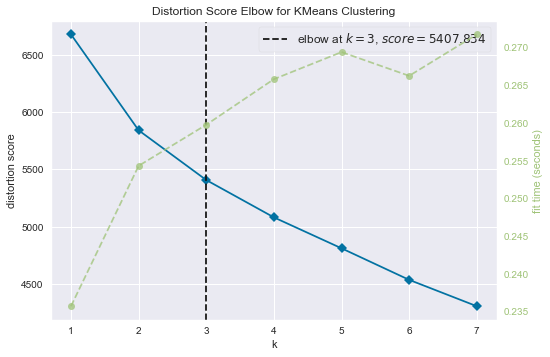

In [109]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,8))
visualizer.fit(fg2)
visualizer.show();

In [110]:
kmeans = KMeans(n_clusters=3,init='k-means++',random_state=0)
pred_kmeans = kmeans.fit_predict(fg1)

In [111]:
fg['pred_kmeans'] = pred_kmeans+1
fg.head()

,gender,past_3_years,AGE,job_industry_category,wealth_segment,owns_car,tenure,state,pred_kmeans
0,Male,86,64,Manufacturing,Mass Customer,Yes,14,QLD,1
1,Male,69,52,Property,Mass Customer,No,16,NSW,1
2,Female,10,47,Financial Services,Affluent Customer,No,10,VIC,2
3,Female,64,43,Manufacturing,Affluent Customer,Yes,5,QLD,1
4,Female,34,56,Financial Services,Affluent Customer,No,19,NSW,2


In [112]:
fg.isnull().sum()

gender                   0
past_3_years             0
AGE                      0
job_industry_category    0
wealth_segment           0
owns_car                 0
tenure                   0
state                    0
pred_kmeans              0
dtype: int64

In [113]:
fg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   gender                 835 non-null    object
 1   past_3_years           835 non-null    int64 
 2   AGE                    835 non-null    int64 
 3   job_industry_category  835 non-null    object
 4   wealth_segment         835 non-null    object
 5   owns_car               835 non-null    object
 6   tenure                 835 non-null    int64 
 7   state                  835 non-null    object
 8   pred_kmeans            835 non-null    int32 
dtypes: int32(1), int64(3), object(5)
memory usage: 55.6+ KB


In [114]:
personal = df[['gender','owns_car','state','wealth_segment','job_industry_category']]

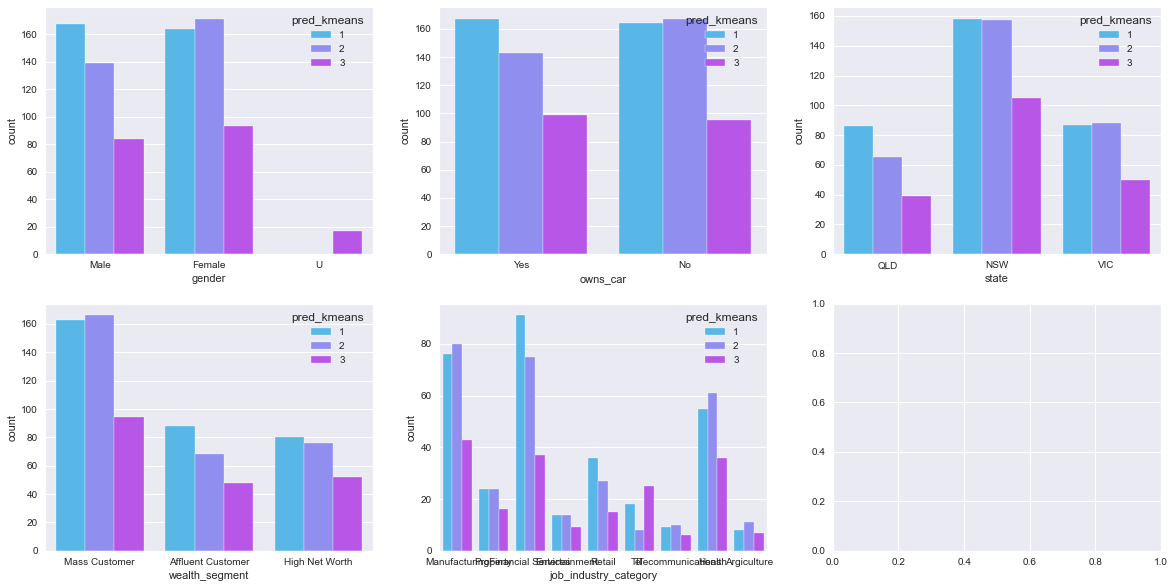

In [115]:
fig,ax = plt.subplots(2,3,figsize=(20,10))
sns.set_style('darkgrid')
for variable, subplot in zip(personal,ax.flatten()):
    sns.countplot(fg[variable],hue=fg['pred_kmeans'],ax=subplot,palette='cool')

In [116]:
other = fg[['AGE','past_3_years','tenure']]

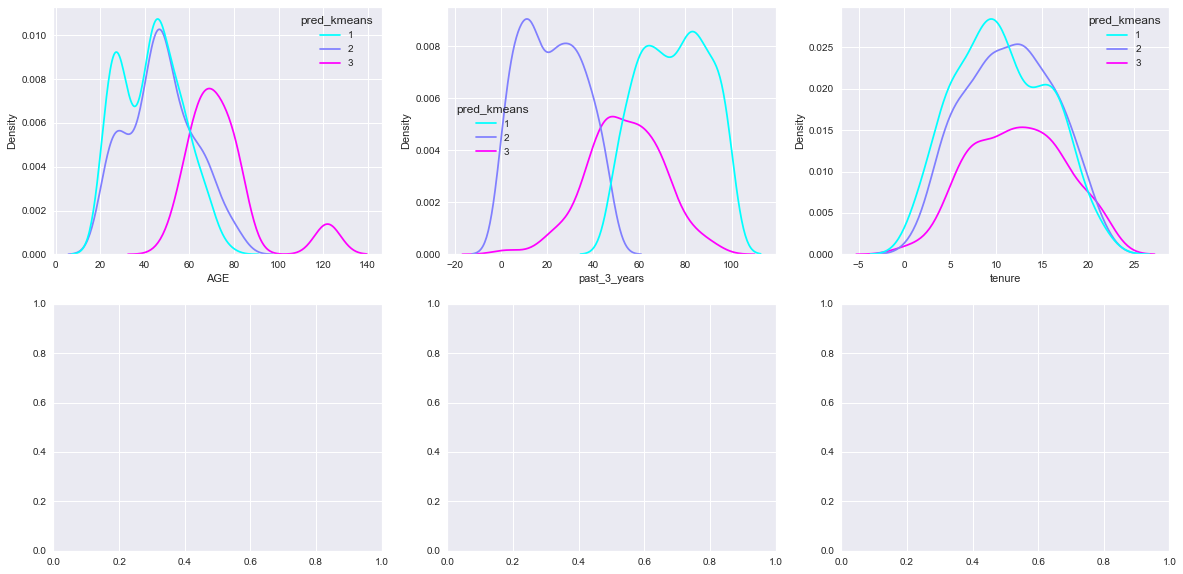

In [117]:
fig,ax = plt.subplots(2,3,figsize=(20,10))
sns.set_style('darkgrid')
for variable, subplot in zip(other,ax.flatten()):
    sns.kdeplot(data= fg,x=variable,hue='pred_kmeans',ax=subplot,palette='cool')

In [118]:
 fg.to_excel('new_data_forger.xls', index=False)

In [1]:
pip install -U notebook-as-pdf

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied, skipping upgrade: websockets<9.0,>=8.1 in c:\users\91623\anaconda3\lib\site-packages (from pyppeteer->notebook-as-pdf) (8.1)



In [8]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.
